In [1]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
from numpy import geomspace
import math
import matplotlib
from cycler import cycler
matplotlib.rcParams['axes.prop_cycle'] = cycler(color='brgmcyk')

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

Welcome to JupyROOT 6.14/04
../InputData/zT_Rebin_8_006zT06zT/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_8_006zT06zT/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_8_006zT06zT/pPb_SE_L0_Correlation_GMB_Ratio.root
../InputData/zT_Rebin_8_006zT06zT/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_8_006zT06zT/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_8_006zT06zT/pPb_SE_L0_Correlation_GMB_Ratio.root


In [2]:
print ZYAM_Min_i
print dPhi_Bins[ZYAM_Min_i]
print ZYAM_Max_i
print dPhi_Bins[ZYAM_Max_i]
print(pTbins)
print(delta_phi_centers)
print(dphi_start_integral)

2
0.392699081699
8
1.57079632679
[12, 40]
[0.09817477042468103, 0.2945243112740431, 0.4908738521234052, 0.6872233929727672, 0.8835729338221293, 1.0799224746714913, 1.2762720155208536, 1.4726215563702154, 1.6689710972195777, 1.8653206380689396, 2.061670178918302, 2.2580197197676637, 2.454369260617026, 2.6507188014663883, 2.84706834231575, 3.043417883165112]
14


In [3]:
print pTbins
print zTbins

[12, 40]
[0.06  0.08  0.107 0.142 0.19  0.253 0.337 0.45  0.6  ]


**root to numpy**

In [4]:
Corrs = ROOT_to_nparray()
#print(Corrs["p-Pb_Uncorr_Estimate"][0][1])
#Plot_UB_Subtraction(Corrs)
#print_from_Dict(Corrs)

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

In [5]:
reload(functions_correlations)
import functions_correlations
from functions_correlations import *

In [6]:
#Plot_Sub_UB_Overlay(Corrs)

In [7]:
Correlated_Subtraction_Weights(Corrs)
#print_from_Dict(Corrs)

In [8]:
#Plot_UB()

**Pedestal Subtraction**

In [9]:
#print_from_Dict(Corrs)
#print(Corrs["pp_CSR"][0])
Plot = False
if Plot:
    for ipt in range(N_pT_Bins):
        for izt in range(NzT):
            fig = plt.figure(figsize=(8,7))
            #Cs_Correlations_Unsub_Overlay(delta_phi_centers, Corrs["pp_CSR"][0][izt],  Corrs["pp_CSR_Errors"][0][izt],UE_binmin=2, UE_binmax=9,label='data',color='black')
            GetRatio(Corrs["pp_CSR"][0][izt],Corrs["pp_CSR_Errors"][0][izt],Corrs["p-Pb_CSR"][0][izt],Corrs["p-Pb_CSR_Errors"][0][izt],delta_phi_centers)
            plt.annotate(r'%1.2f < $z_\mathrm{T}$ < %1.2f'%(zTbins[izt],zTbins[izt+1]), xy=(0.99, 0.01), xycoords='axes fraction', ha='right', va='bottom', fontsize=16)

            plt.savefig('pics/%s/%s/Befor_After_UE_pp-pPb_pT_%i_zT_%i.pdf'%(Shower,description_string,ipt,izt))

In [10]:
Ped_Sub_After_Cs(Corrs)

In [11]:
#Plot_pp_pPb_Cs(Corrs)
#Plot_pp_pPb_Cs_Individual(Corrs)
#Compare_Cs_pTBins()

**Debugging**

In [12]:
print("Number of Away side bins = %i"%(N_Phi_Integrate))

print(Corrs['pp_CSR'][0][3])

for SYS in Systems:
    print(SYS)
    vals = Corrs['%s_CSR'%(SYS)][0][3][-N_Phi_Integrate:] #2nd zT bin
    Integral = np.sum(vals)/(dPhi_Width*N_Phi_Integrate)

    val_errors = Corrs['%s_CSR_Errors'%(SYS)][0][3][-N_Phi_Integrate:]
    Integral_Err = math.sqrt(np.sum(val_errors**2))/(dPhi_Width*N_Phi_Integrate)

    UE_Error = Corrs['%s_Uncorr_Error'%(SYS)][0][3][1]/(dPhi_Width*(ZYAM_Max_i-ZYAM_Min_i)) #is a scalar

    print("%f +\- %f +\- %f"%(Integral,Integral_Err,UE_Error))
    Total_Err = math.sqrt(Integral_Err**2 + UE_Error**2)
    print(Total_Err/Integral)
    
    print("non-dphi rate %1.3f"%(Corrs['%s_Uncorr_Error'%(SYS)][0][3][1]))

Number of Away side bins = 2
[-0.01667081  0.05037715 -0.01678901 -0.01464005  0.01611776 -0.01009013
  0.00917237  0.01622905  0.00546762  0.00307289  0.03552334  0.01858413
  0.03005831  0.09296599  0.08478212  0.03362636]
pp
0.301525 +\- 0.099692 +\- 0.037939
0.3537597787572283
non-dphi rate 0.045
p-Pb
0.634113 +\- 0.111276 +\- 0.048244
0.19126591831177614
non-dphi rate 0.057


**Average Cs**: $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ in each $z_\mathrm{T}$ bin (i)

/Users/fernando/Library/Python/2.7/lib/python/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


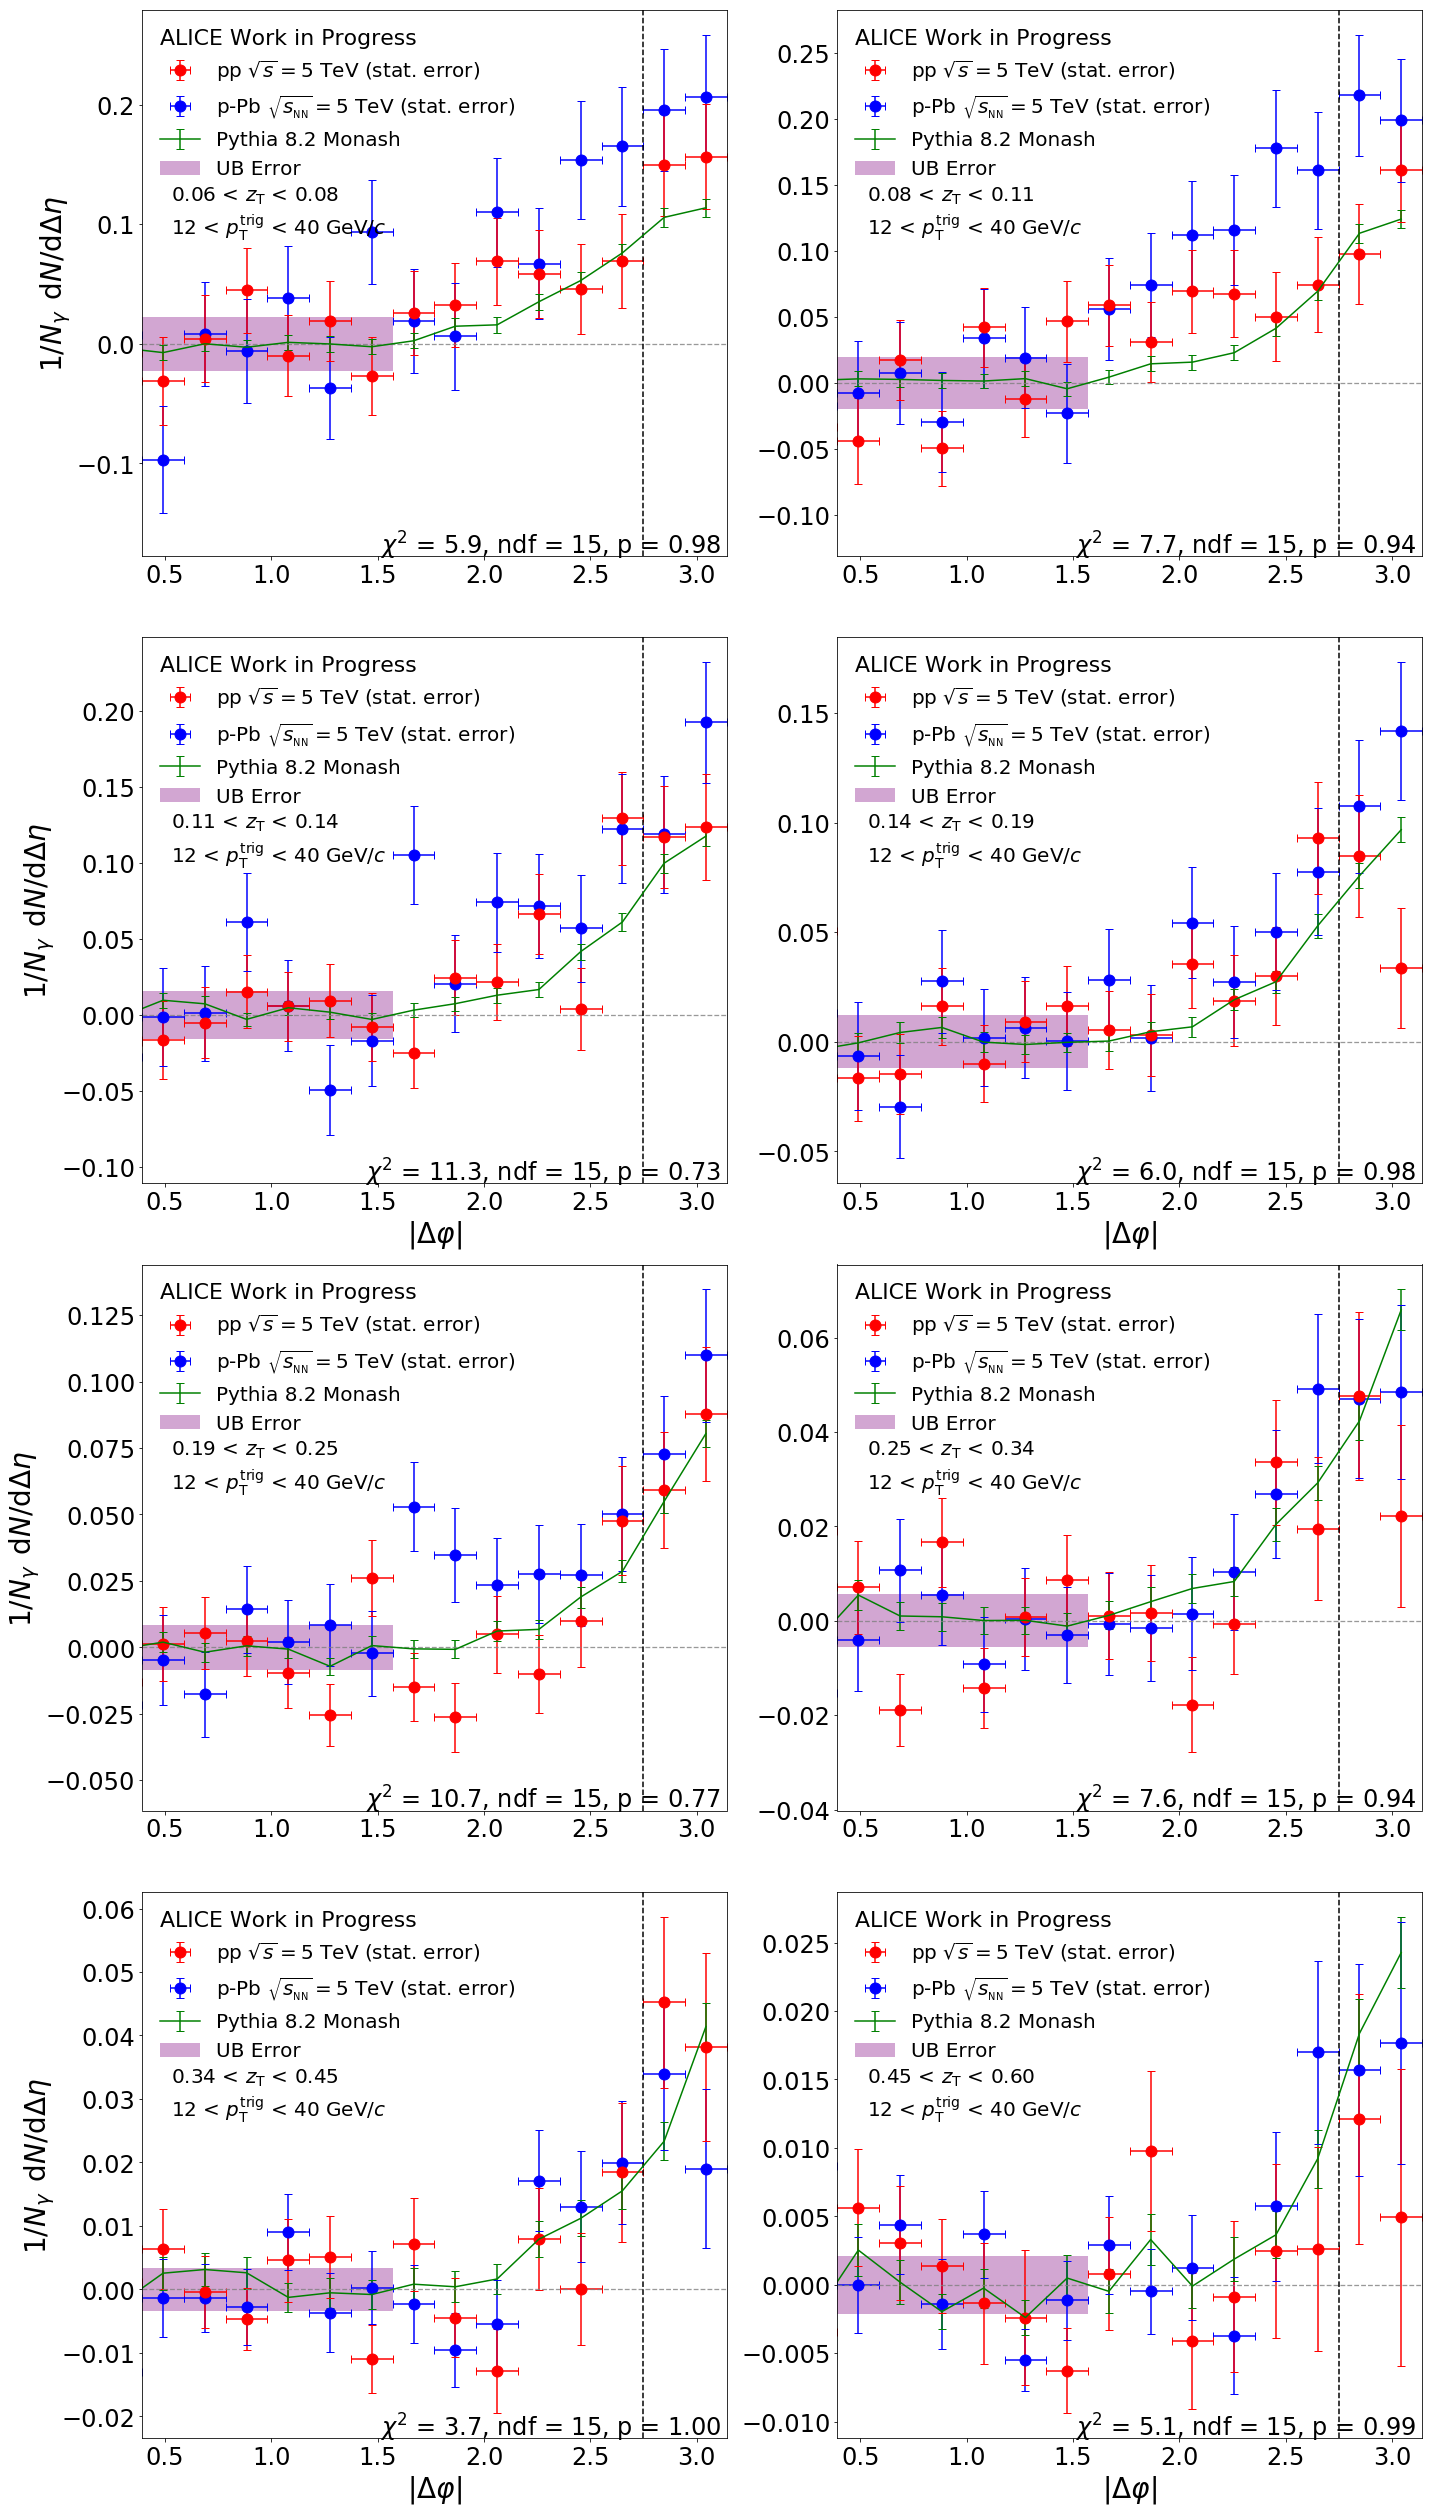

In [13]:
Avg_Corr = Cs_Weighted_Average(Corrs)
Plot_pp_pPb_Cs(Avg_Corr)
#Plot_pp_pPb_Cs_Individual(Avg_Corr)

In [14]:
reload(functions_correlations)
from functions_correlations import *

In [15]:
Frags = Get_Fragmentation(Corrs)
print Frags.keys()
LaTeX_Results_Summary(Frags)
LaTeX_Ratio_Systematics(Frags)
#print(Frags["pp_FF_Errors"][0])
#print(Frags["pp_purity_FF_Errors"])
#for i in range(len(Frags["pp_FF"][0])):
#    print("%f"%(Frags["pp_FF_Errors"][0][i]/Frags["pp_FF"][0][i])),

['pp_purity_FF_Errors', 'p-Pb_FF_Errors', 'pp_FF_Errors', 'p-Pb_UE_FF_Errors', 'pp_FF', 'p-Pb_FF', 'pp_UE_FF_Errors', 'p-Pb_purity_FF_Errors']
[[0.71166791 0.45554036 0.27691878 0.15519266 0.08631379 0.04329598
  0.0213164  0.01115957]]
                        LaTeX Table
Source   &  pp data & p--Pb~data  \\
Statistical Uncertainty & 22\%-86\% & 17\%-36\% \\
\hline
Purity & 15\%-15\% & 15\%-15\% \\
UE & 6\%-20\% & 7\%-9\% \\
Tracking Efficiency &  5\% & 5\%  \\ 
pp


$\zt$ interval  & Statistics  & UE Estimate  & Purity   & Tracking Efficiency \\
\hline
0.06 - 0.08 & 30\% & 13\% & 21\% & 7\%\\
0.08 - 0.11 & 29\% & 12\% & 21\% & 7\%\\
0.11 - 0.14 & 29\% & 11\% & 21\% & 7\%\\
0.14 - 0.19 & 40\% & 15\% & 21\% & 7\%\\
0.19 - 0.25 & 31\% & 10\% & 21\% & 7\%\\
0.25 - 0.34 & 48\% & 14\% & 21\% & 7\%\\
0.34 - 0.45 & 42\% & 11\% & 21\% & 7\%\\
0.45 - 0.60 & 93\% & 21\% & 21\% & 7\%\\
p-Pb


$\zt$ interval  & Statistics  & UE Estimate  & Purity   & Tracking Efficiency \\
\hline
0.06 - 0.08 & 30\

In [16]:
reload(functions_fragmentation)
from functions_fragmentation import *

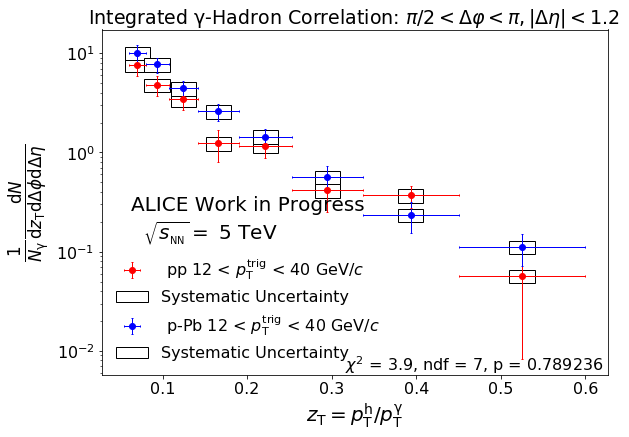

                    pp Central Values:
[7.64493108 4.79868121 3.43878186 1.23342166 1.16575106 0.41571827
 0.36895912 0.05681081]

                    pp Stat. Uncertainty:
[1.69206762 1.10560031 0.74078847 0.43633497 0.27793753 0.16245684
 0.09107923 0.04861349]

              pp Systematic Uncertainty:
[1.18953685 0.74666574 0.53506797 0.19191808 0.18138867 0.06468498
 0.05740934 0.00883965]

                    p-Pb Central Values:
[10.03794536  7.71755888  4.44467501  2.59391313  1.44833265  0.56891012
  0.23407102  0.11123269]

                    p-Pb Stat. Uncertainty:
[2.02619979 1.3370209  0.86683379 0.49612718 0.28384182 0.1566185
 0.07956914 0.04006692]

              p-Pb Systematic Uncertainty:
[1.56188536 1.2008376  0.69158305 0.40360799 0.22535783 0.08852134
 0.03642101 0.0173076 ]

                        LaTeX Table
Source   &  pp data & \pPb~data  \\
Statistical Uncertainty & 22\%-86\% & 17\%-36\% \\
\hline
Purity & 15\%-15\% & 15\%-15\% \\
Tracking Efficiency &  5\% 

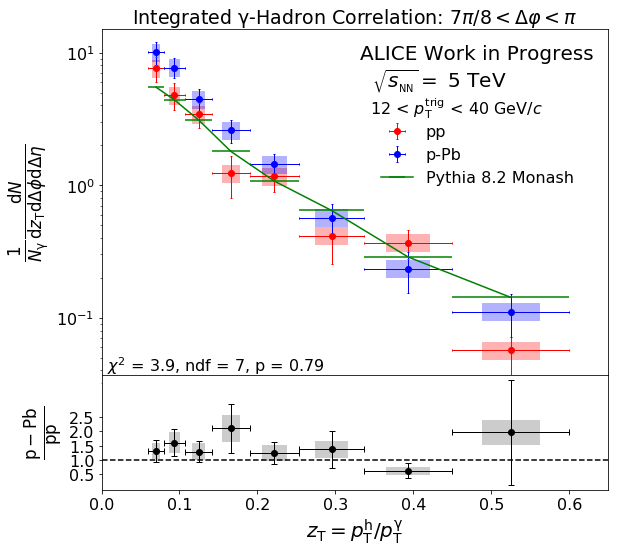

pp_purity_FF_Errors:
1.1264, 0.7071, 0.5067, 0.1817, 0.1718, 0.0613, 0.0544, 0.0084, 

p-Pb_FF_Errors:
2.0262, 1.3370, 0.8668, 0.4961, 0.2838, 0.1566, 0.0796, 0.0401, 

pp_FF_Errors:
1.6921, 1.1056, 0.7408, 0.4363, 0.2779, 0.1625, 0.0911, 0.0486, 

p-Pb_UE_FF_Errors:
0.8891, 0.5780, 0.3611, 0.1973, 0.1042, 0.0512, 0.0214, 0.0086, 

pp_FF:
7.6449, 4.7987, 3.4388, 1.2334, 1.1658, 0.4157, 0.3690, 0.0568, 

p-Pb_FF:
10.0379, 7.7176, 4.4447, 2.5939, 1.4483, 0.5689, 0.2341, 0.1112, 

pp_UE_FF_Errors:
0.7117, 0.4555, 0.2769, 0.1552, 0.0863, 0.0433, 0.0213, 0.0112, 

p-Pb_purity_FF_Errors:
1.4790, 1.1371, 0.6549, 0.3822, 0.2134, 0.0838, 0.0345, 0.0164, 



In [17]:
Combined_Frags = Average_FF(Frags)
Plot_pp_pPb_Avg_FF(Combined_Frags)

print(Combined_Frags.keys())

Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)
print_from_Dict(Frags)


printthis = False
if printthis == True:
    print("zT Centers:")
    for izt in zT_centers:
        print("%1.2f,"%(izt)),
    print("")

    print("zT Widths:")
    for izt in zT_widths:
        print("%1.4f,"%(izt)),

#Frags_Avg_Cs = Get_Fragmentation(Avg_Corr,True)
#print_from_Dict(Frags_Avg_Cs)
#Plot_pp_pPb_Avg_FF_and_Ratio(Frags_Avg_Cs)

In [18]:
a = 730/521
a = 0.0730/0.0521
print(1.0/a)
7.7810
b = 1.1465/7.7810
print(b)

0.713698630137
0.147346099473


zT_Rebin_8_006zT06zT Intg. 7\pi/8  & $2.07 \pm 0.13$ & 1.15  & $2.21 \pm 0.10$ & 1.30  & $3.92/7\ 0.79 $\\


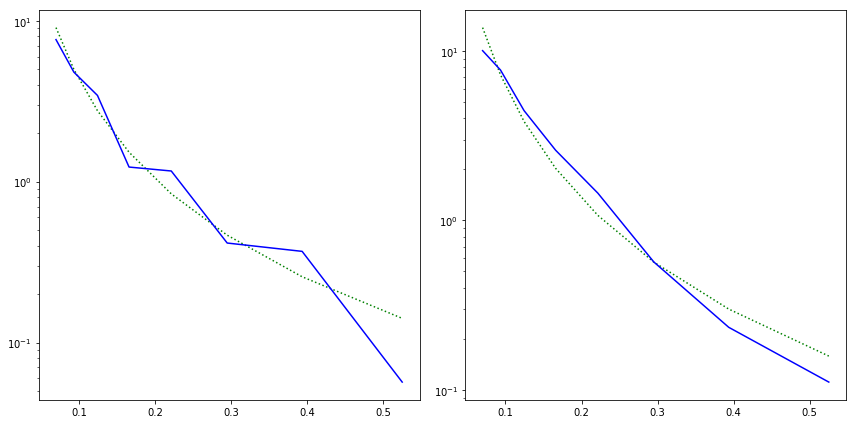

In [19]:
LaTeX_Table(Combined_Frags)

[0.30229021 0.25195734 0.20691041 0.17136981 0.15214989 0.15542794
 0.17997883 0.21875373 0.26559422 0.31694426 0.37093574 0.42656683
 0.48327164 0.54071247 0.5986775  0.65702801 0.71566971 0.77453648
 0.83358062 0.89276695]
1.15484370093


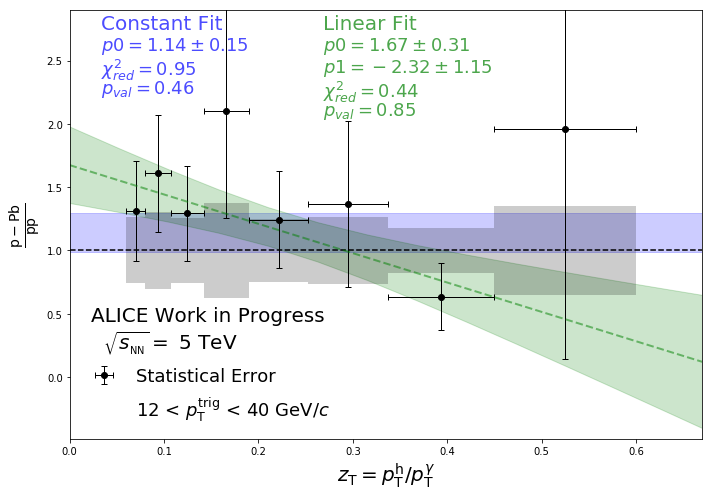

                Central Values:
[1.31301973 1.60826663 1.29251438 2.1030222  1.24240303 1.36849921
 0.63440908 1.95794939]

                Satistical Uncertainty Absolute:
[0.39332095 0.46360536 0.37559111 0.84574086 0.3834404  0.65416743
 0.26652248 1.81782383]

               Relative Satistical Uncertainty:
[0.29955449 0.28826399 0.2905895  0.40215499 0.30862803 0.47801813
 0.42011139 0.92843249]

                Ratio Uncertainty from Purity:
[0.2431884  0.27904508 0.24079171 0.3431196  0.23499525 0.24974085
 0.17449588 0.32394513]

                Ratio Uncertainty from Single Track Efficiency:
[0.09284452 0.11372162 0.09139457 0.14870613 0.08785116 0.09676751
 0.0448595  0.13844793]

                Full Systematic Uncertainty:
[0.26030886 0.30132833 0.25755313 0.37395798 0.25087964 0.26783286
 0.18016989 0.35229005]

                LaTeX Table:
$\zt$ range & pp & p--Pb & p--Pb/pp \\
0.06 - 0.08 & 7.645 $\pm$ 1.692 & 10.038 $\pm$ 2.026 & 1.313 $\pm$ 0.393 \\
0.08 - 0.11 & 4.799

In [20]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
#pp_pPB_Avg_Ratio(Frags_Avg_Cs,0)

### Compare Different Integrations

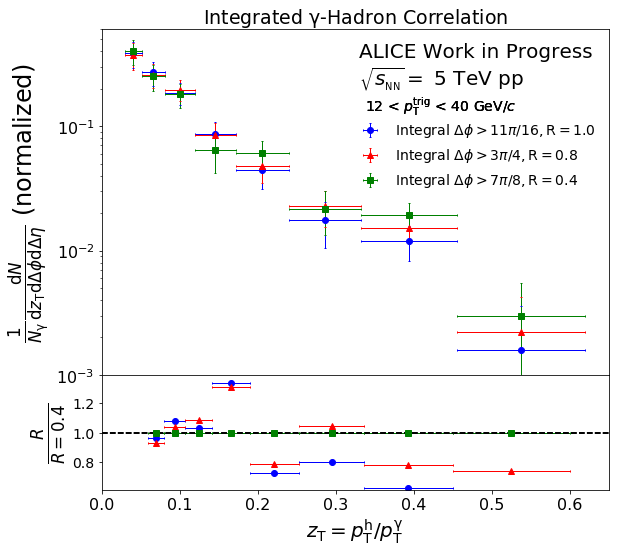

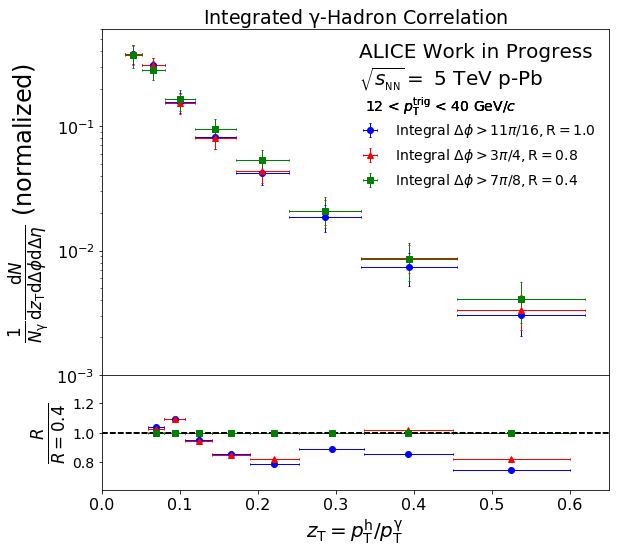

In [21]:
ranges = (1.9,2.15,2.7)
strings = ("11\pi/16, \mathrm{R} = 1.0","3\pi/4,\mathrm{R} = 0.8","7\pi/8, \mathrm{R} = 0.4","15\pi/16, \mathrm{R} = 0.2")

Compare_FF_Integration(ranges,strings)

In [22]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [23]:
reload(functions_correlations)
import functions_correlations
from functions_correlations import *

zT_Rebin_8_006zT06zTpPb
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTpPb.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTpPb.npy
zT_Rebin_8_006zT06zTPbp
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTPbp.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTPbp.npy
zT_Rebin_8_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy


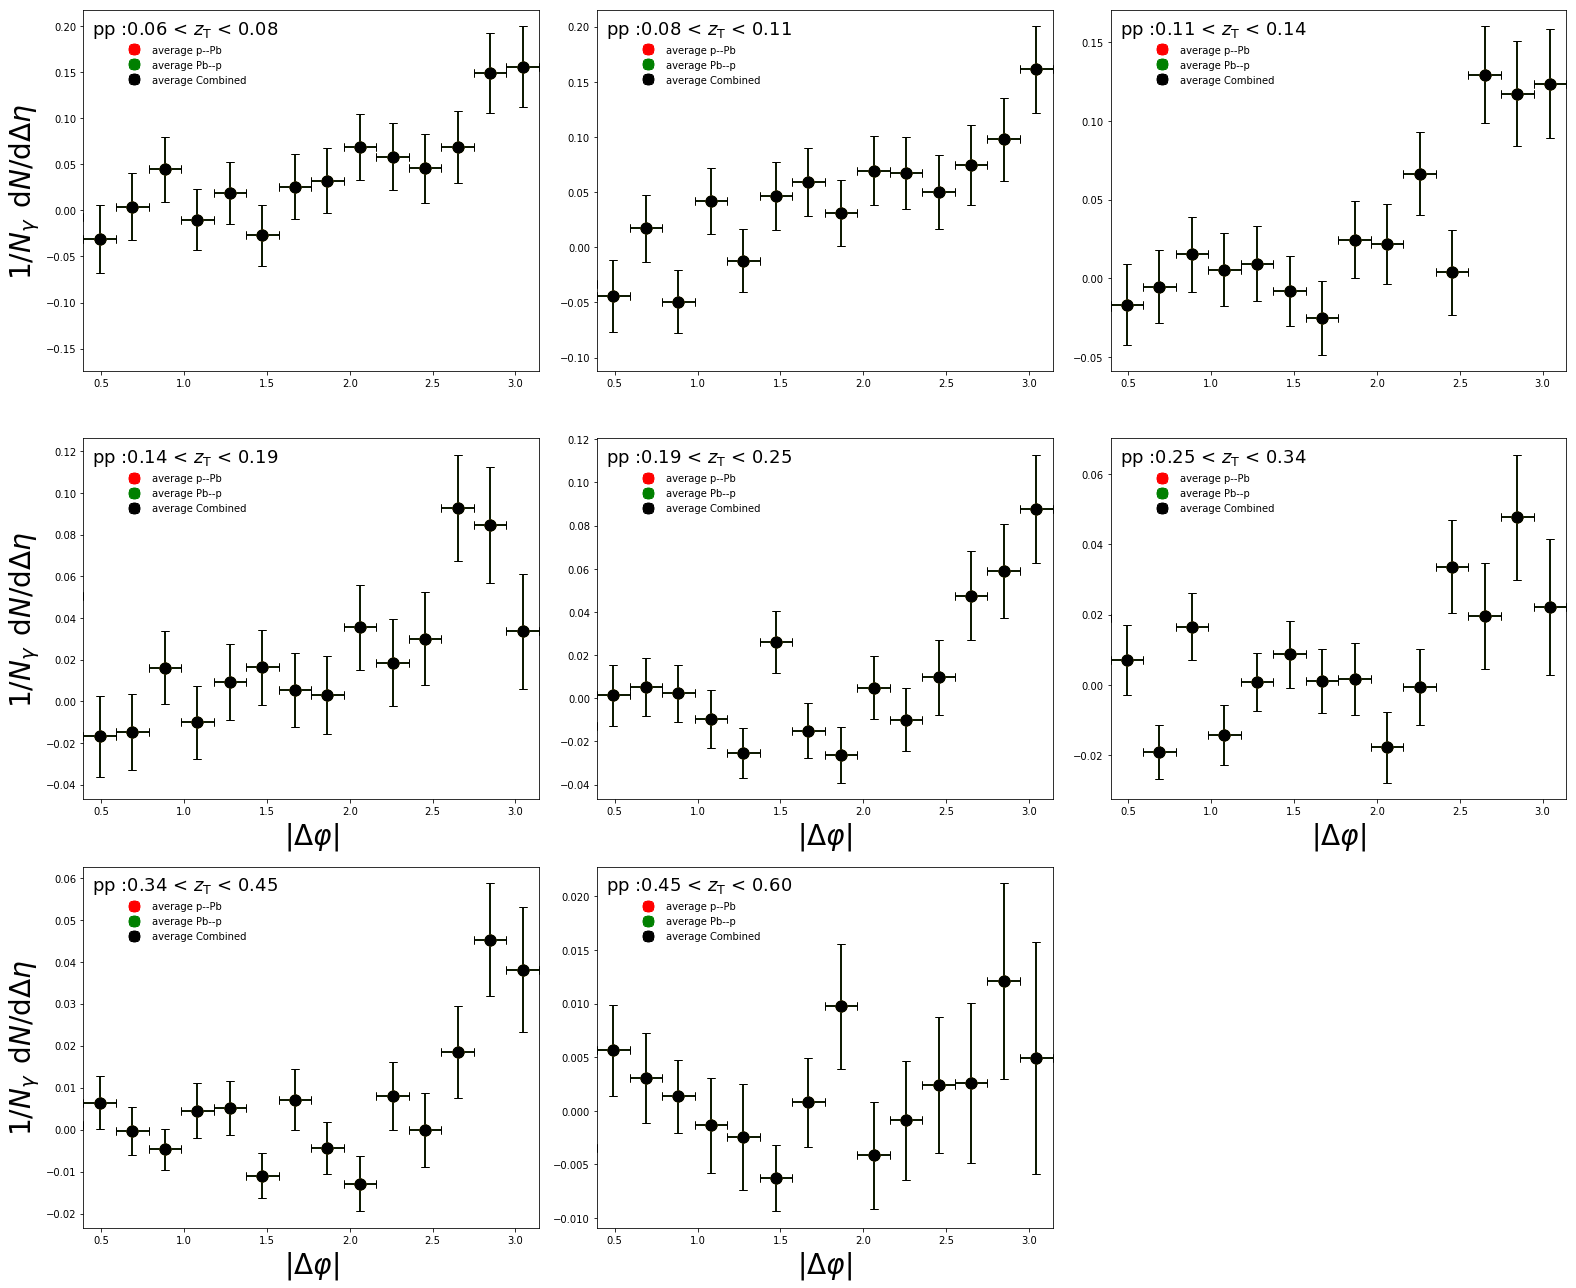

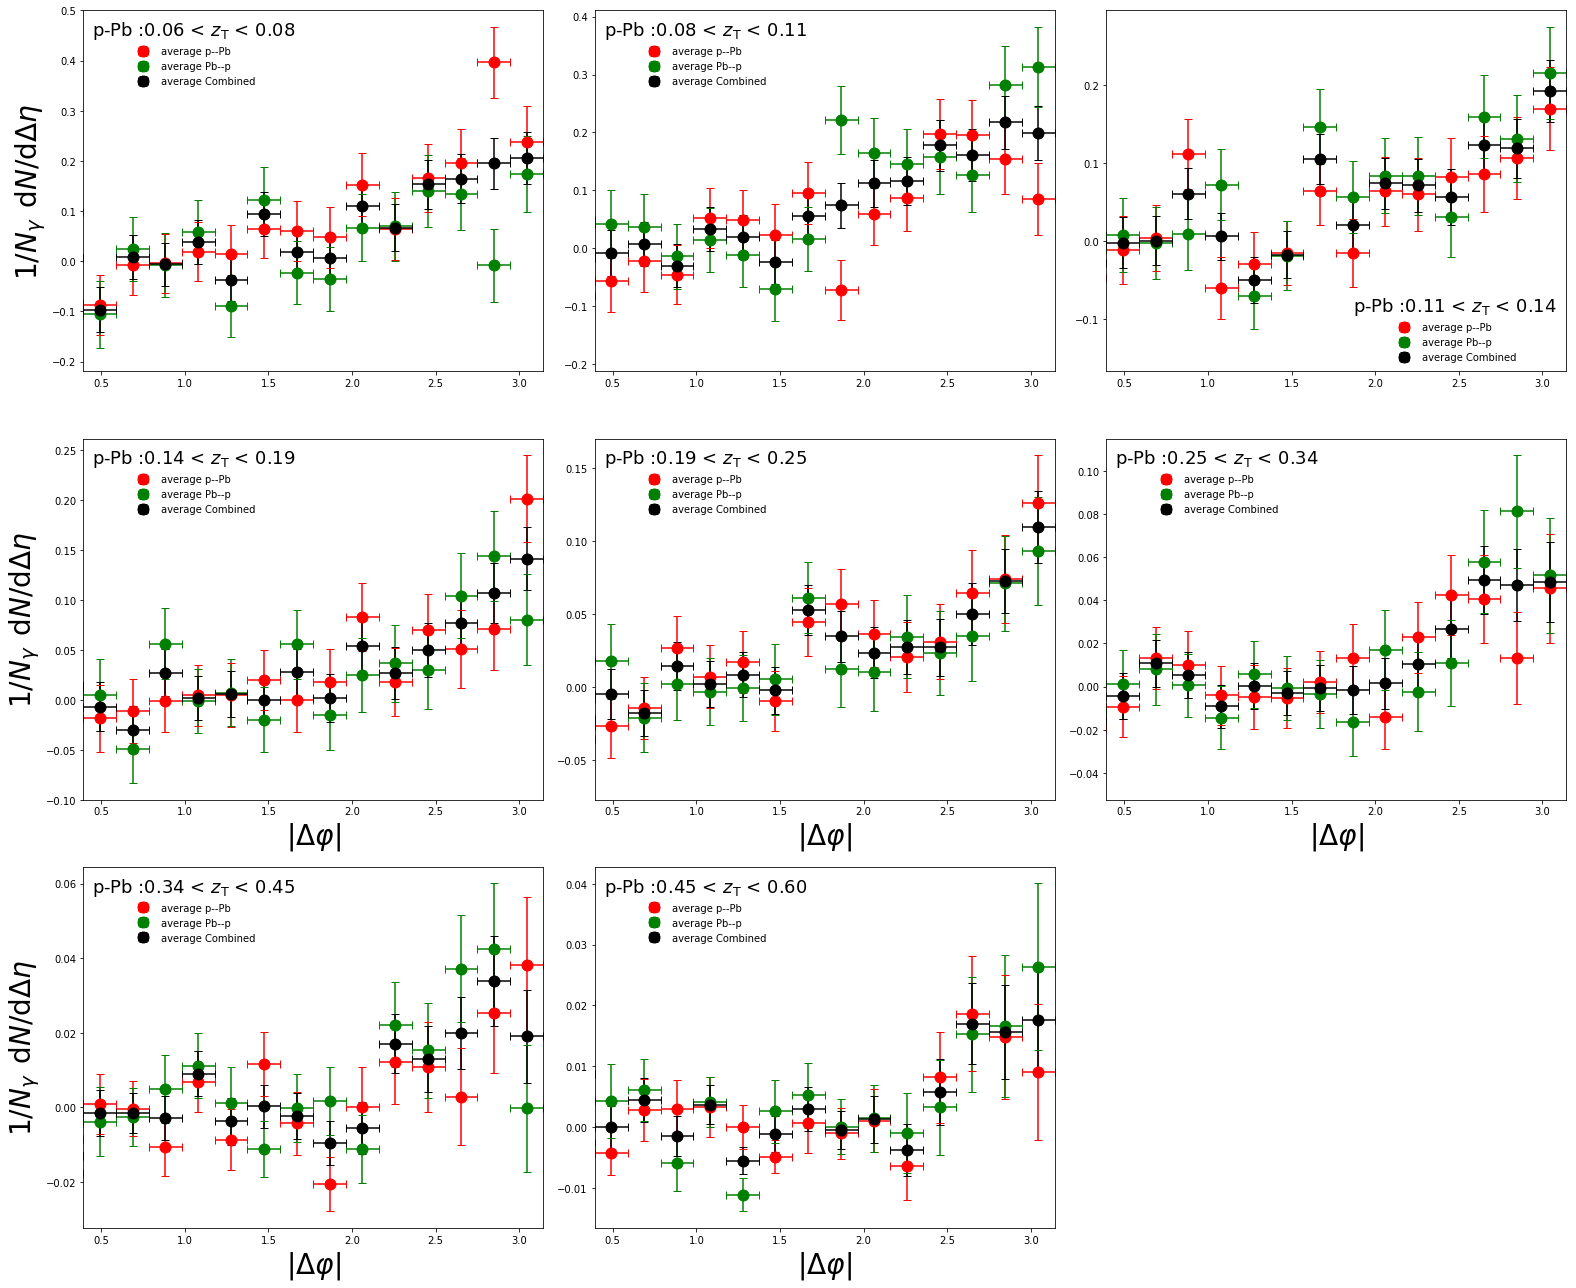

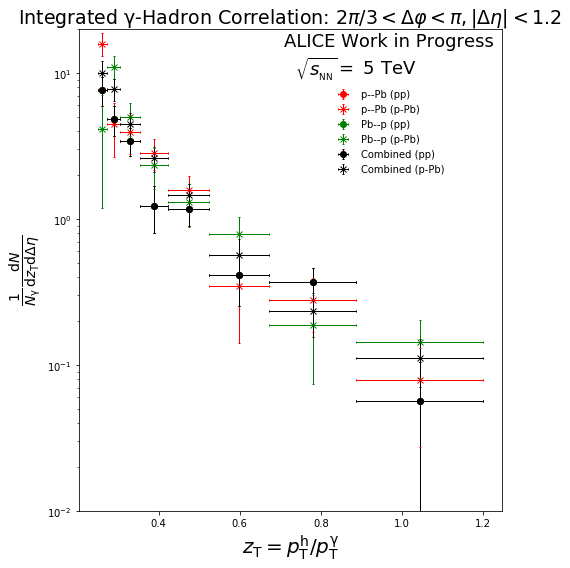

                Central Values:


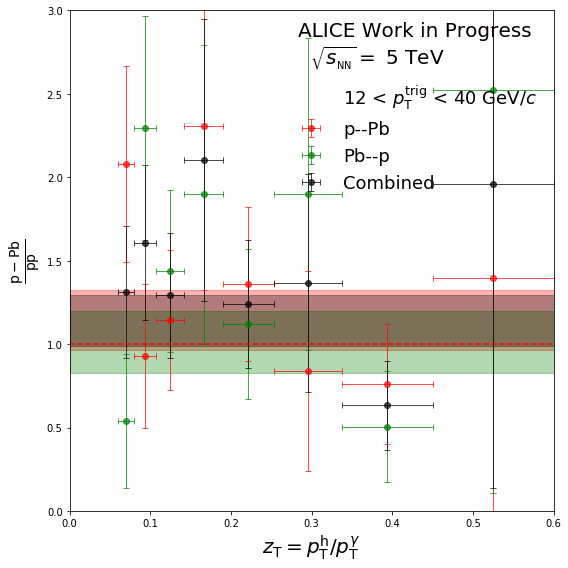

                Central Values:
[1.31301973 1.60826663 1.29251438 2.1030222  1.24240303 1.36849921
 0.63440908 1.95794939]

****************************************
Minimizer is Linear
Chi2                      =      5.83049
NDf                       =            7
p0                        =      1.14564   +/-   0.180387    

****************************************
Minimizer is Linear
Chi2                      =      10.5028
NDf                       =            7
p0                        =      1.01395   +/-   0.184605    

****************************************
Minimizer is Linear
Chi2                      =      6.66939
NDf                       =            7
p0                        =      1.14197   +/-   0.152282    


In [29]:
save_name = "Beam_Flip"
strings = ["zT_Rebin_8_006zT06zTpPb","zT_Rebin_8_006zT06zTPbp","zT_Rebin_8_006zT06zT"]
string_descriptions = ["p--Pb","Pb--p","Combined"]
colors = ["red","green","black"]
Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

zT_Rebin_8_006zT06zTOldBinNewNewPurity
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTOldBinNewNewPurity.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTOldBinNewNewPurity.npy
pT_Rebin_2_006zT06zTOldBinNewNewPurity
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_2_006zT06zTOldBinNewNewPurity.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_2_006zT06zTOldBinNewNewPurity.npy


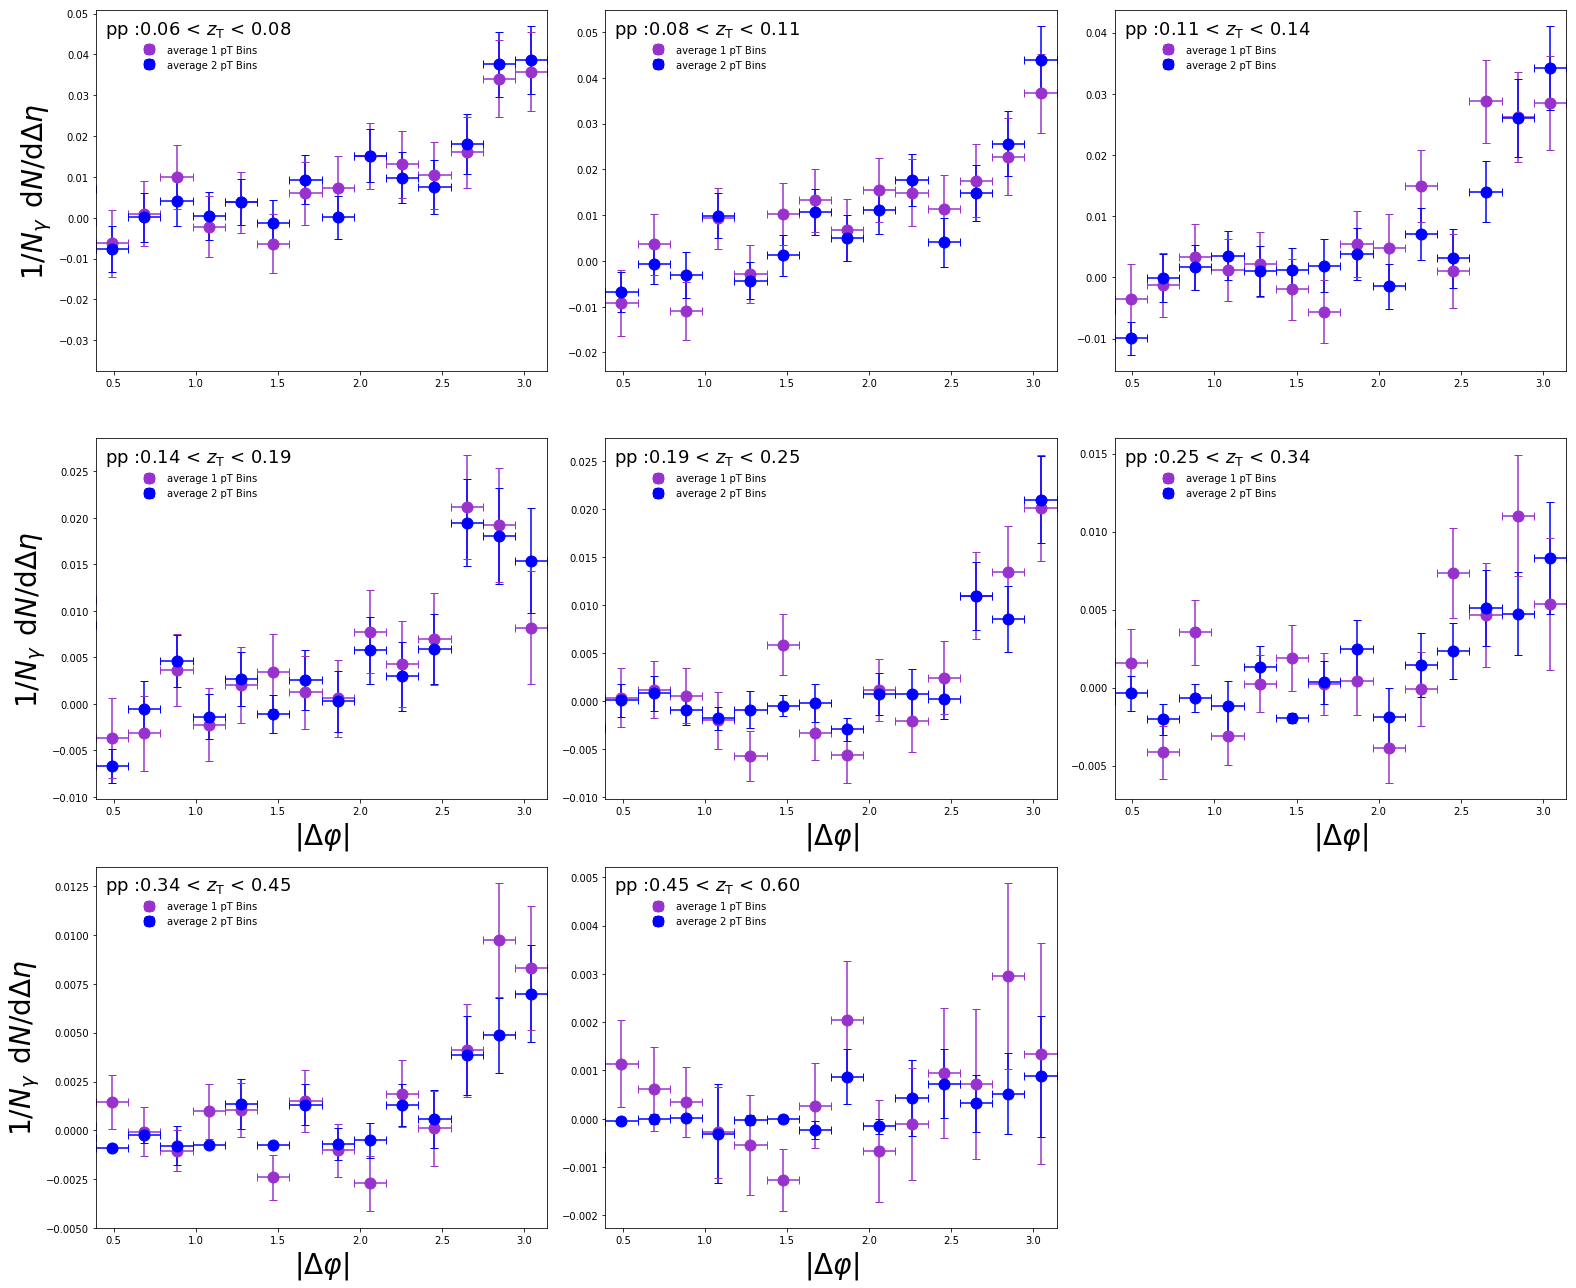

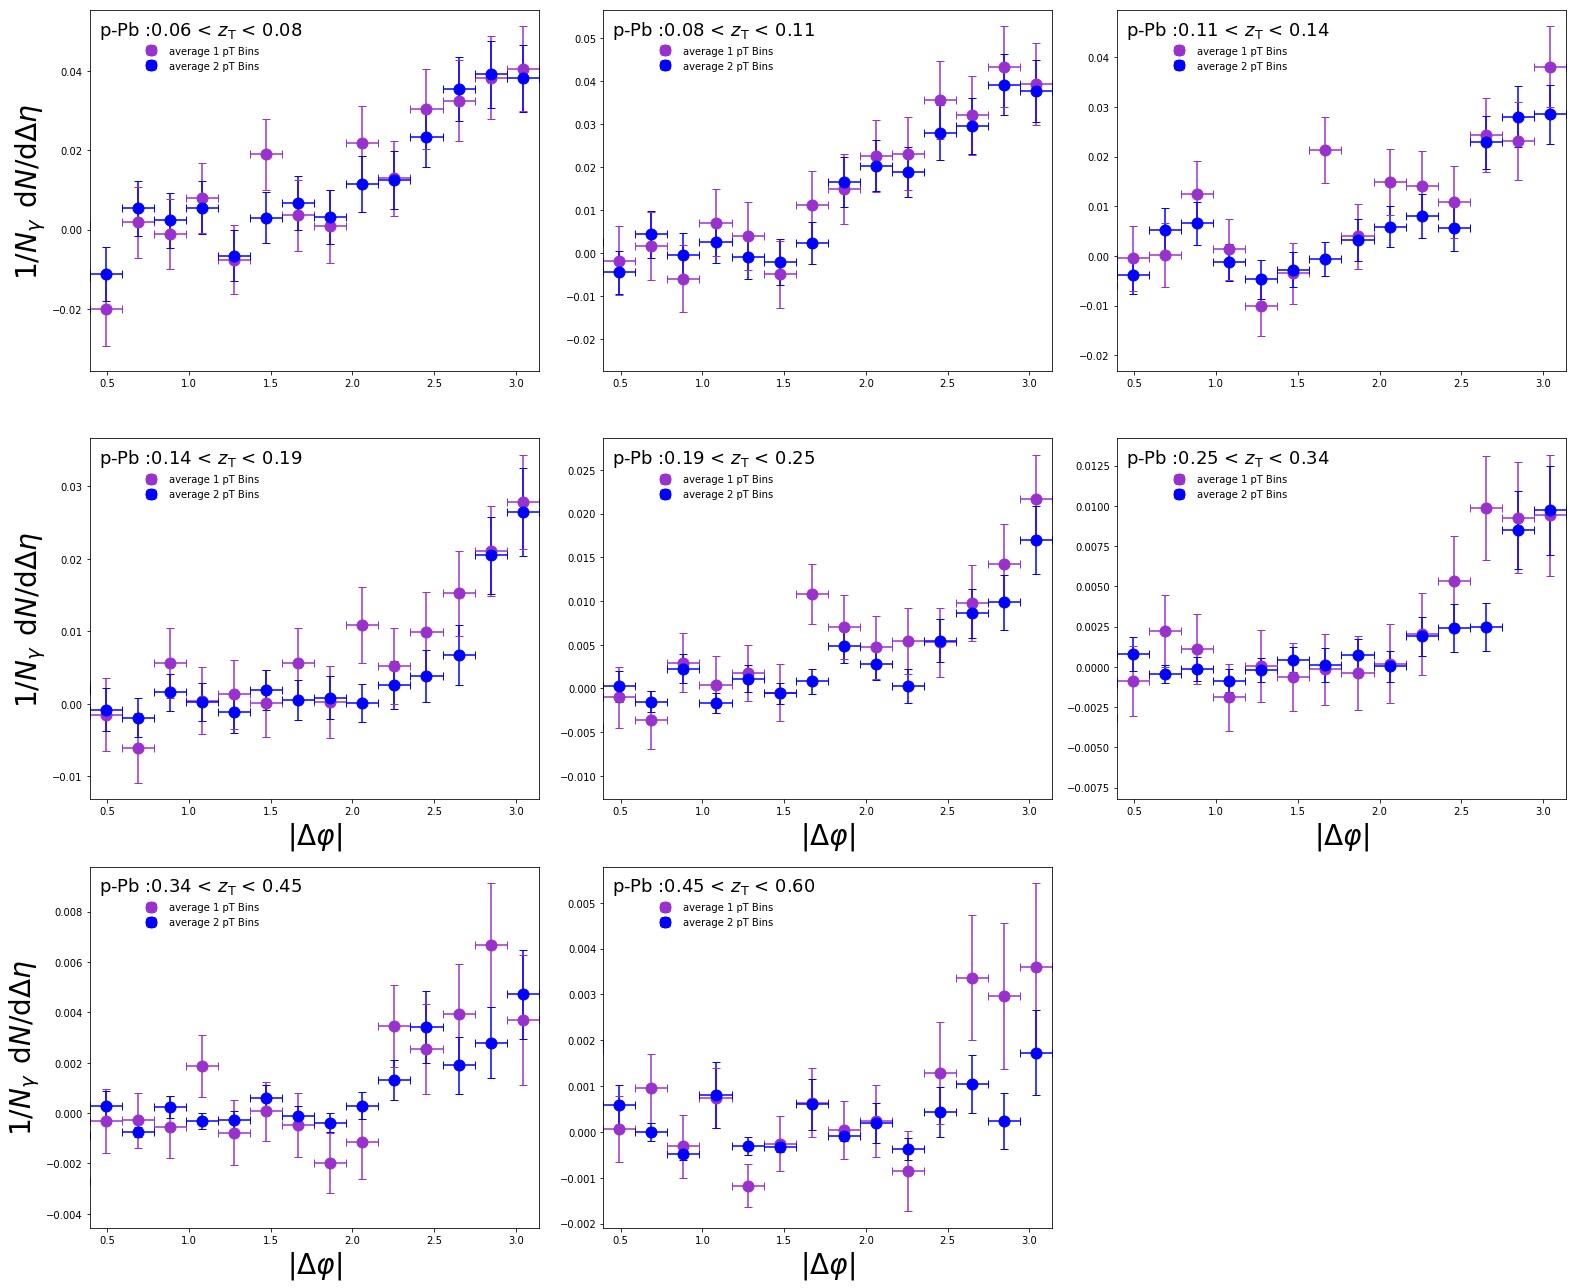

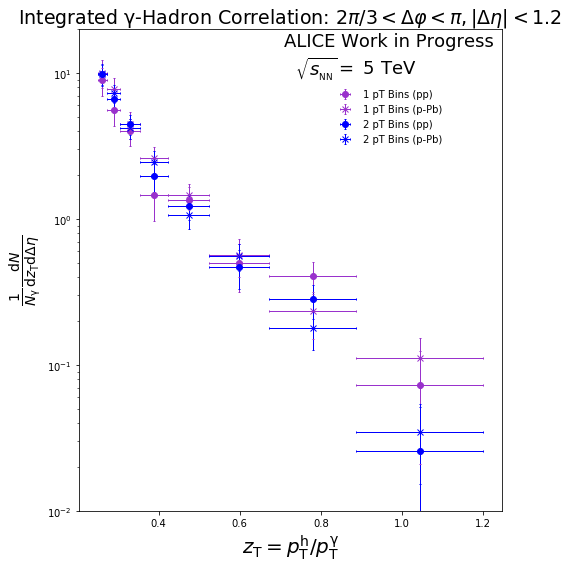

                Central Values:


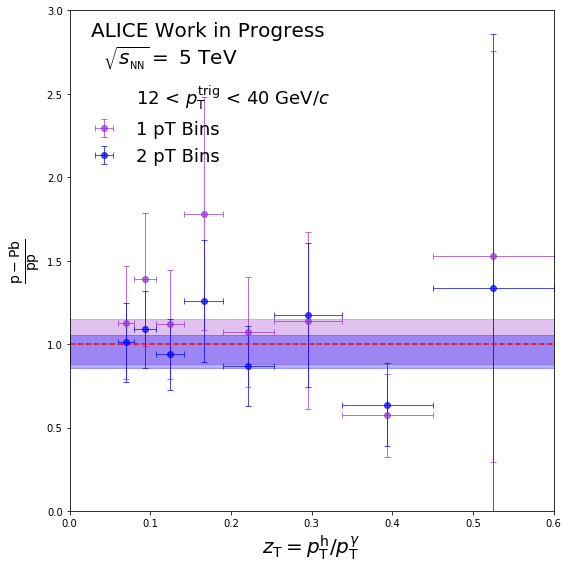

                Central Values:
[1.01093505 1.08854106 0.93861889 1.25833172 0.869122   1.17409343
 0.63776337 1.33439492]

****************************************
Minimizer is Linear
Chi2                      =      5.71077
NDf                       =            7
p0                        =      1.01644   +/-   0.133719    

****************************************
Minimizer is Linear
Chi2                      =      3.14836
NDf                       =            7
p0                        =     0.956749   +/-   0.0976632   


In [25]:
save_name = "Beam_Flip"
strings = ["zT_Rebin_8_006zT06zTOldBinNewNewPurity","pT_Rebin_2_006zT06zTOldBinNewNewPurity"]
string_descriptions = ["1 pT Bins","2 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

zT_Rebin_8_006zT06zTOldBinNewNewPurity
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTOldBinNewNewPurity.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTOldBinNewNewPurity.npy
zT_Rebin_7_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_7_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_7_006zT06zT.npy
zT_Rebin_9_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_9_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_9_006zT06zT.npy


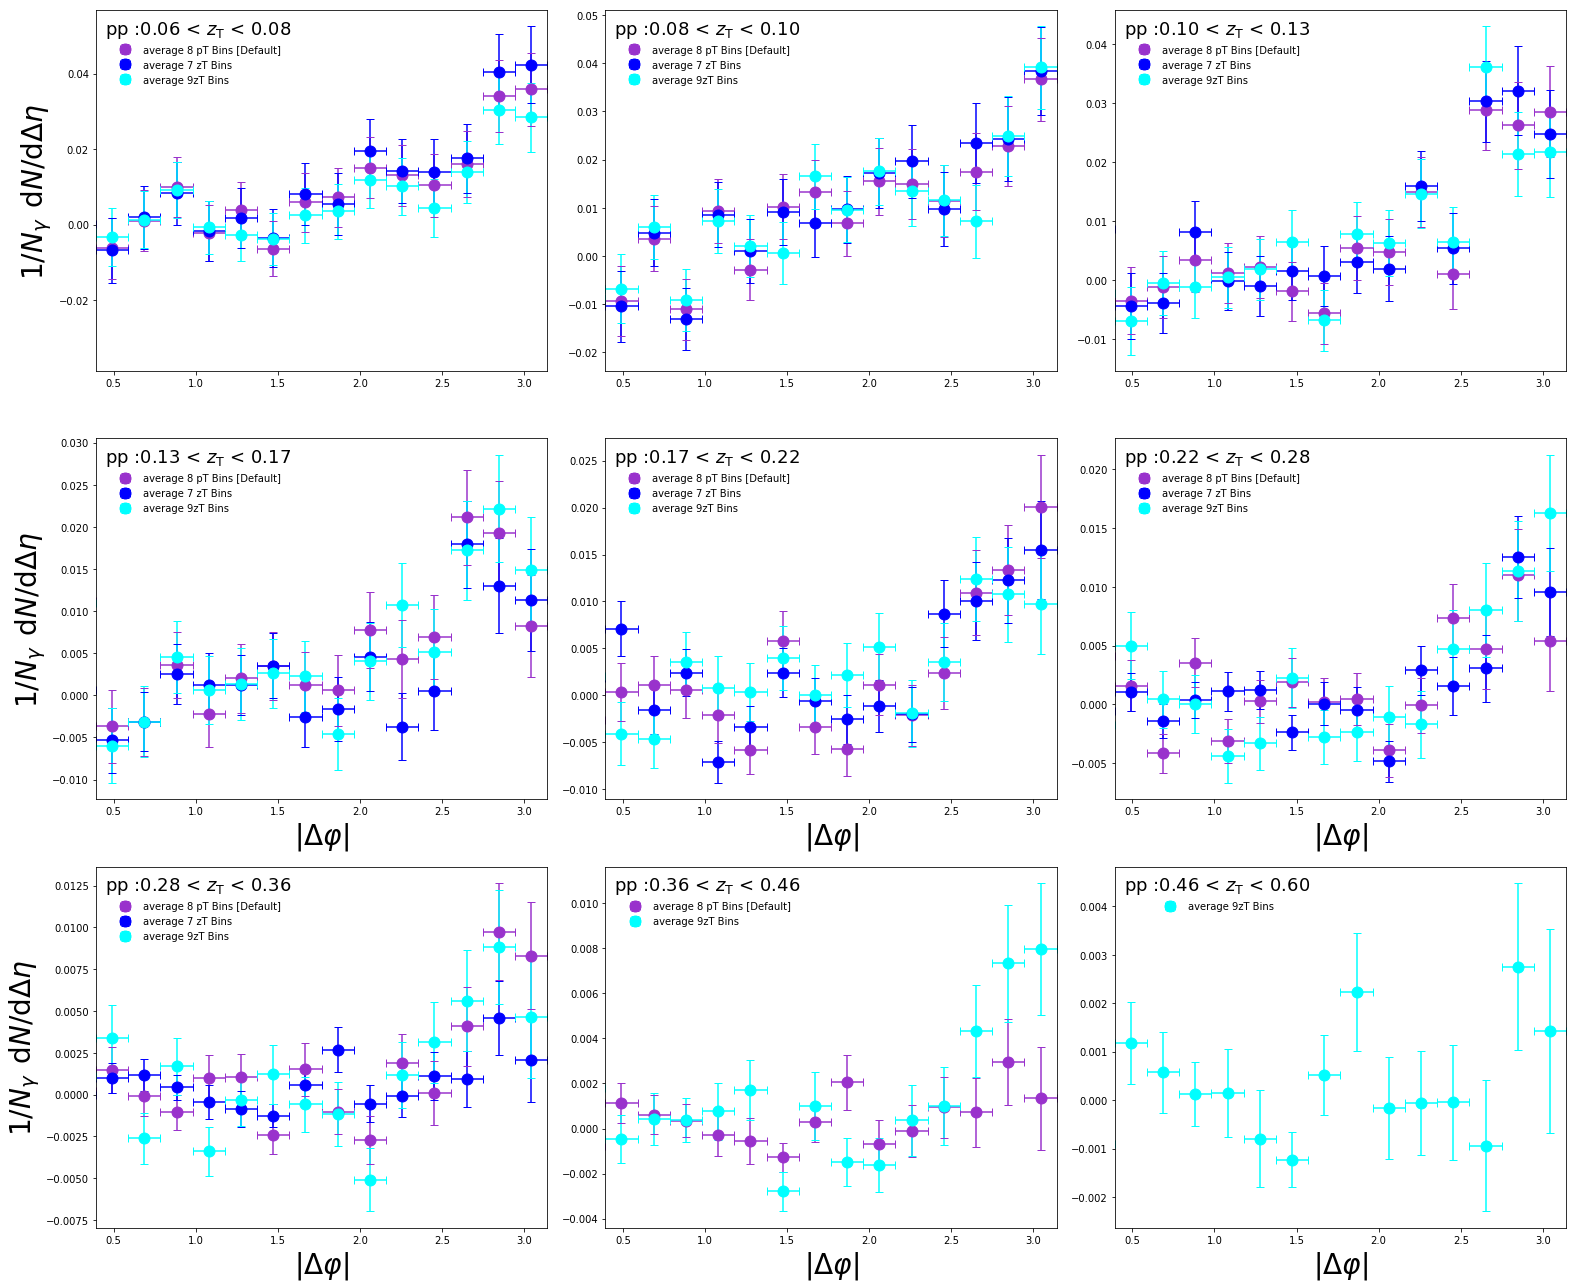

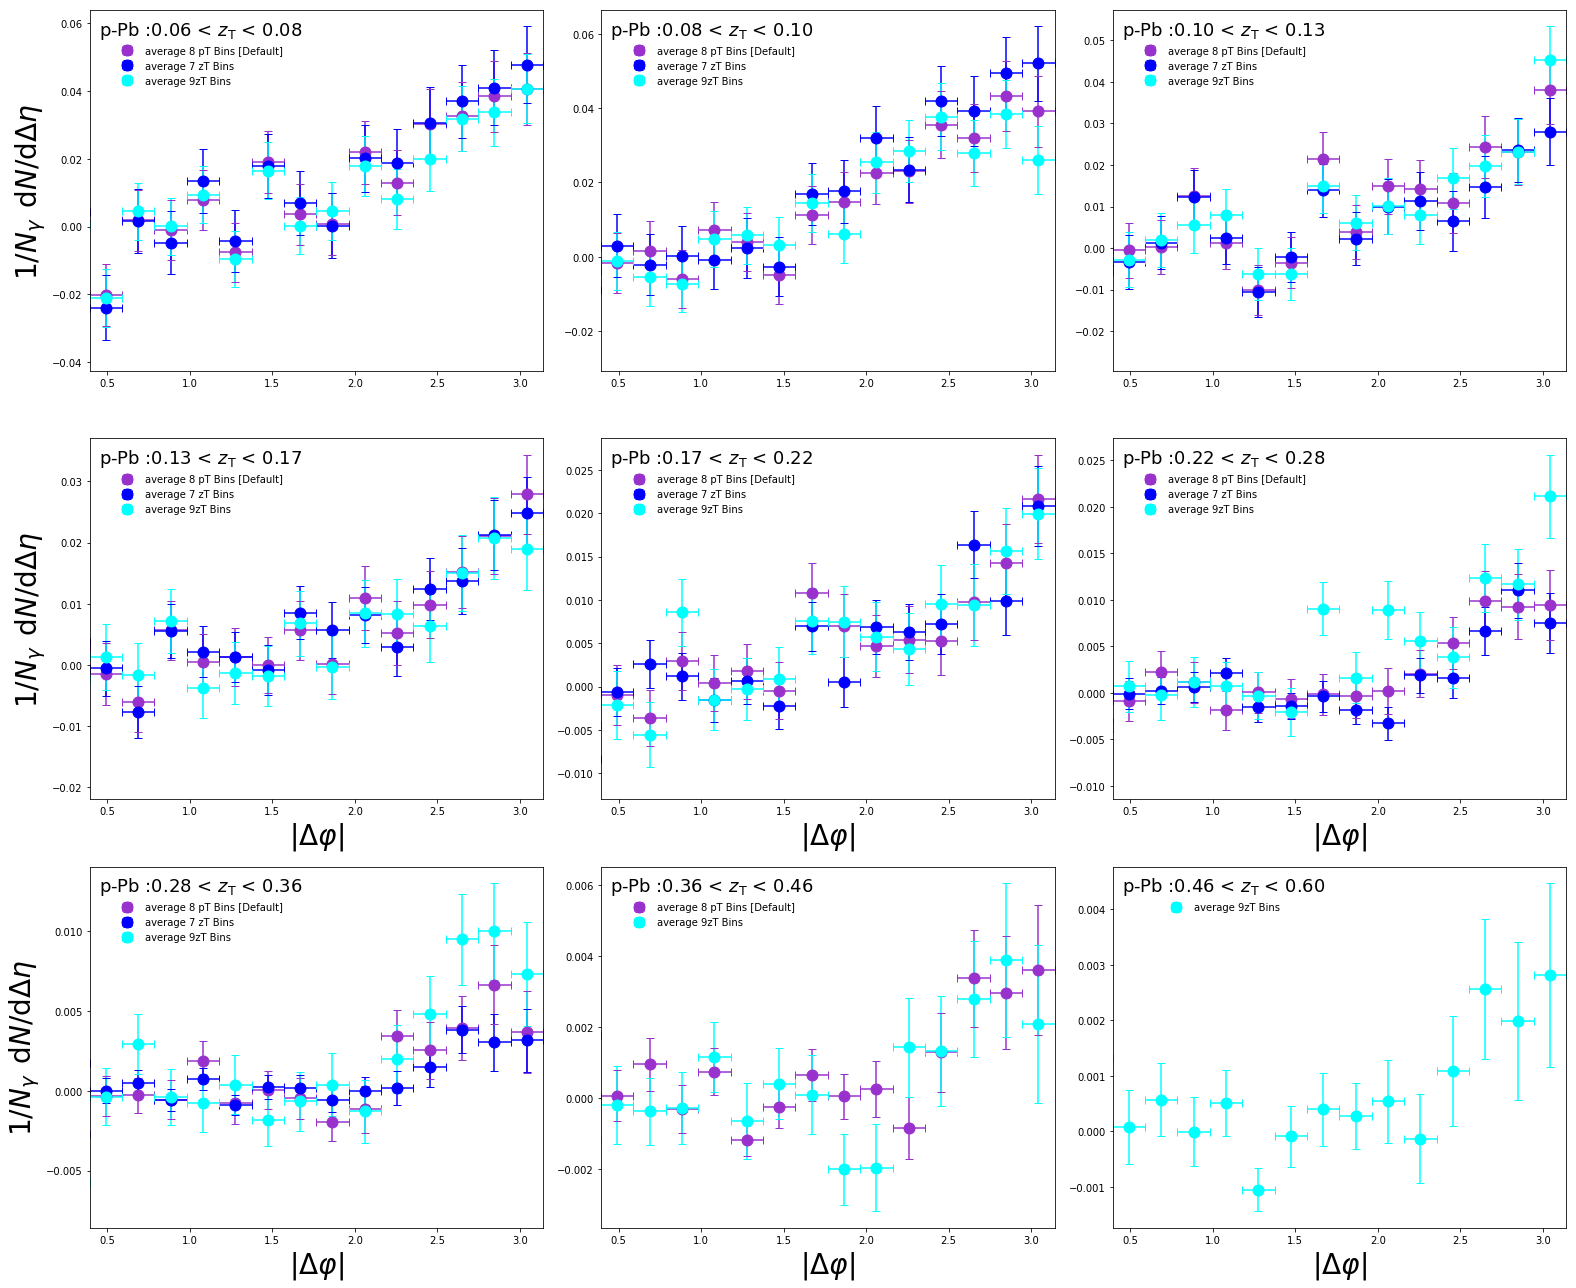

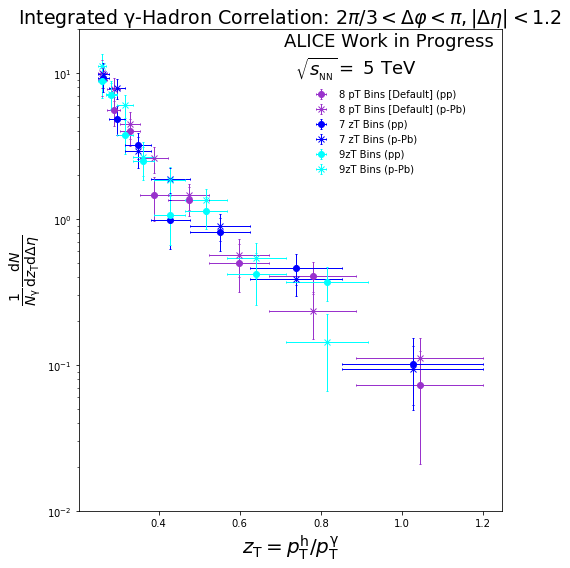

                Central Values:


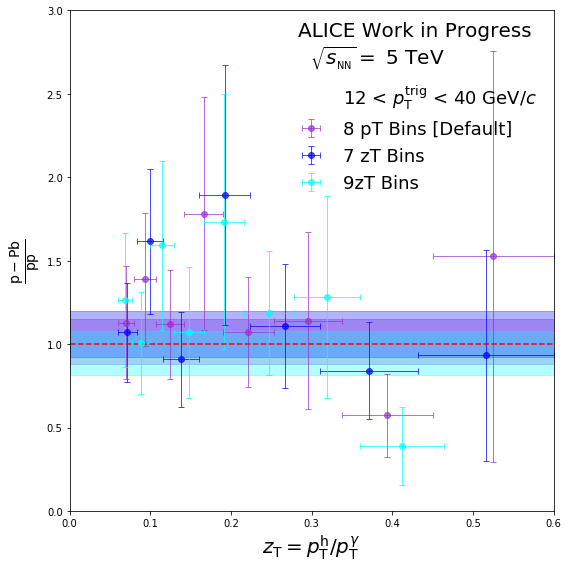

                Central Values:
[1.26432146 1.00883928 1.59188485 1.07046074 1.73434792 1.18782758
 1.28530072 0.38923048 1.15312974]

****************************************
Minimizer is Linear
Chi2                      =      5.71077
NDf                       =            7
p0                        =      1.01644   +/-   0.133719    

****************************************
Minimizer is Linear
Chi2                      =      3.70791
NDf                       =            6
p0                        =      1.06003   +/-   0.137798    

****************************************
Minimizer is Linear
Chi2                      =      9.92142
NDf                       =            8
p0                        =     0.946562   +/-   0.130805    


In [26]:
save_name = "zT_Comparison"
strings = ["zT_Rebin_8_006zT06zTOldBinNewNewPurity","zT_Rebin_7_006zT06zT","zT_Rebin_9_006zT06zT"]
string_descriptions = ["8 pT Bins [Default]","7 zT Bins", "9zT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

zT_Rebin_8_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
zT_Rebin_8_006zT06zTOldBinNewNewPurity_Small_Zyam
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTOldBinNewNewPurity_Small_Zyam.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTOldBinNewNewPurity_Small_Zyam.npy


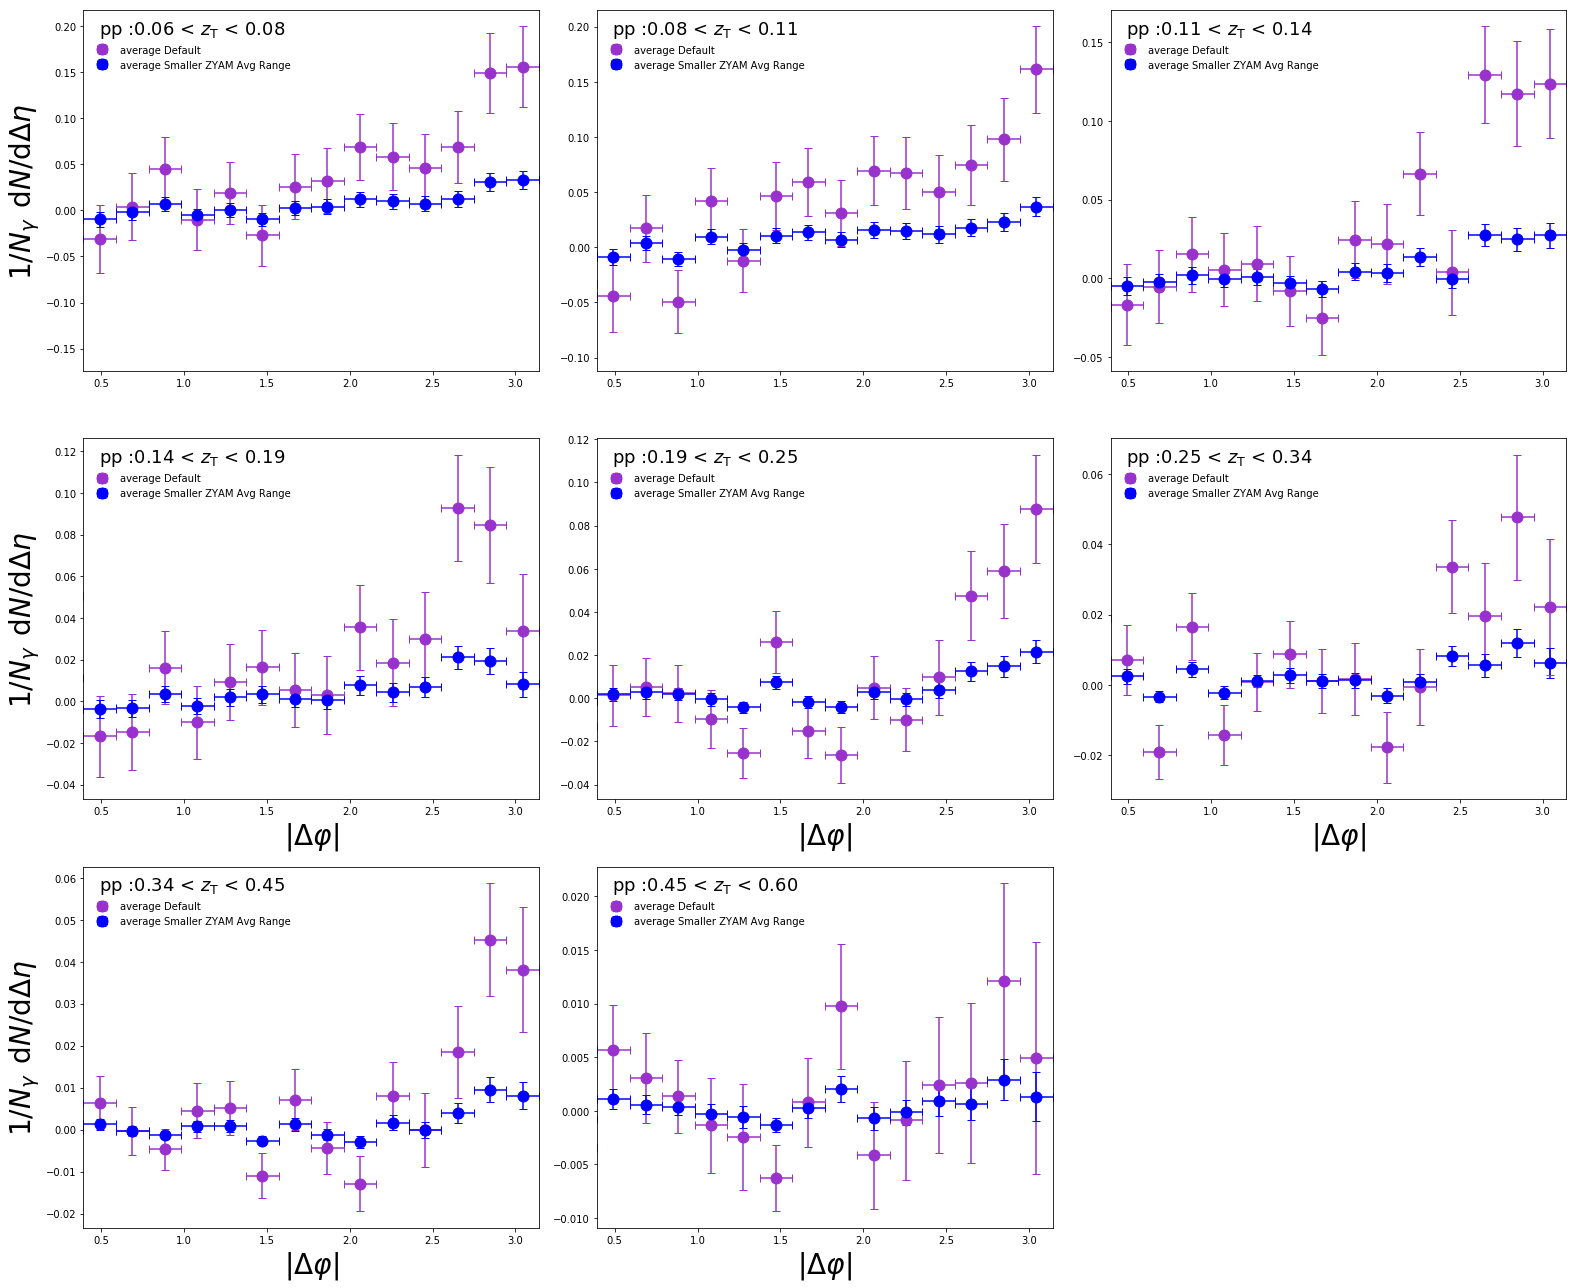

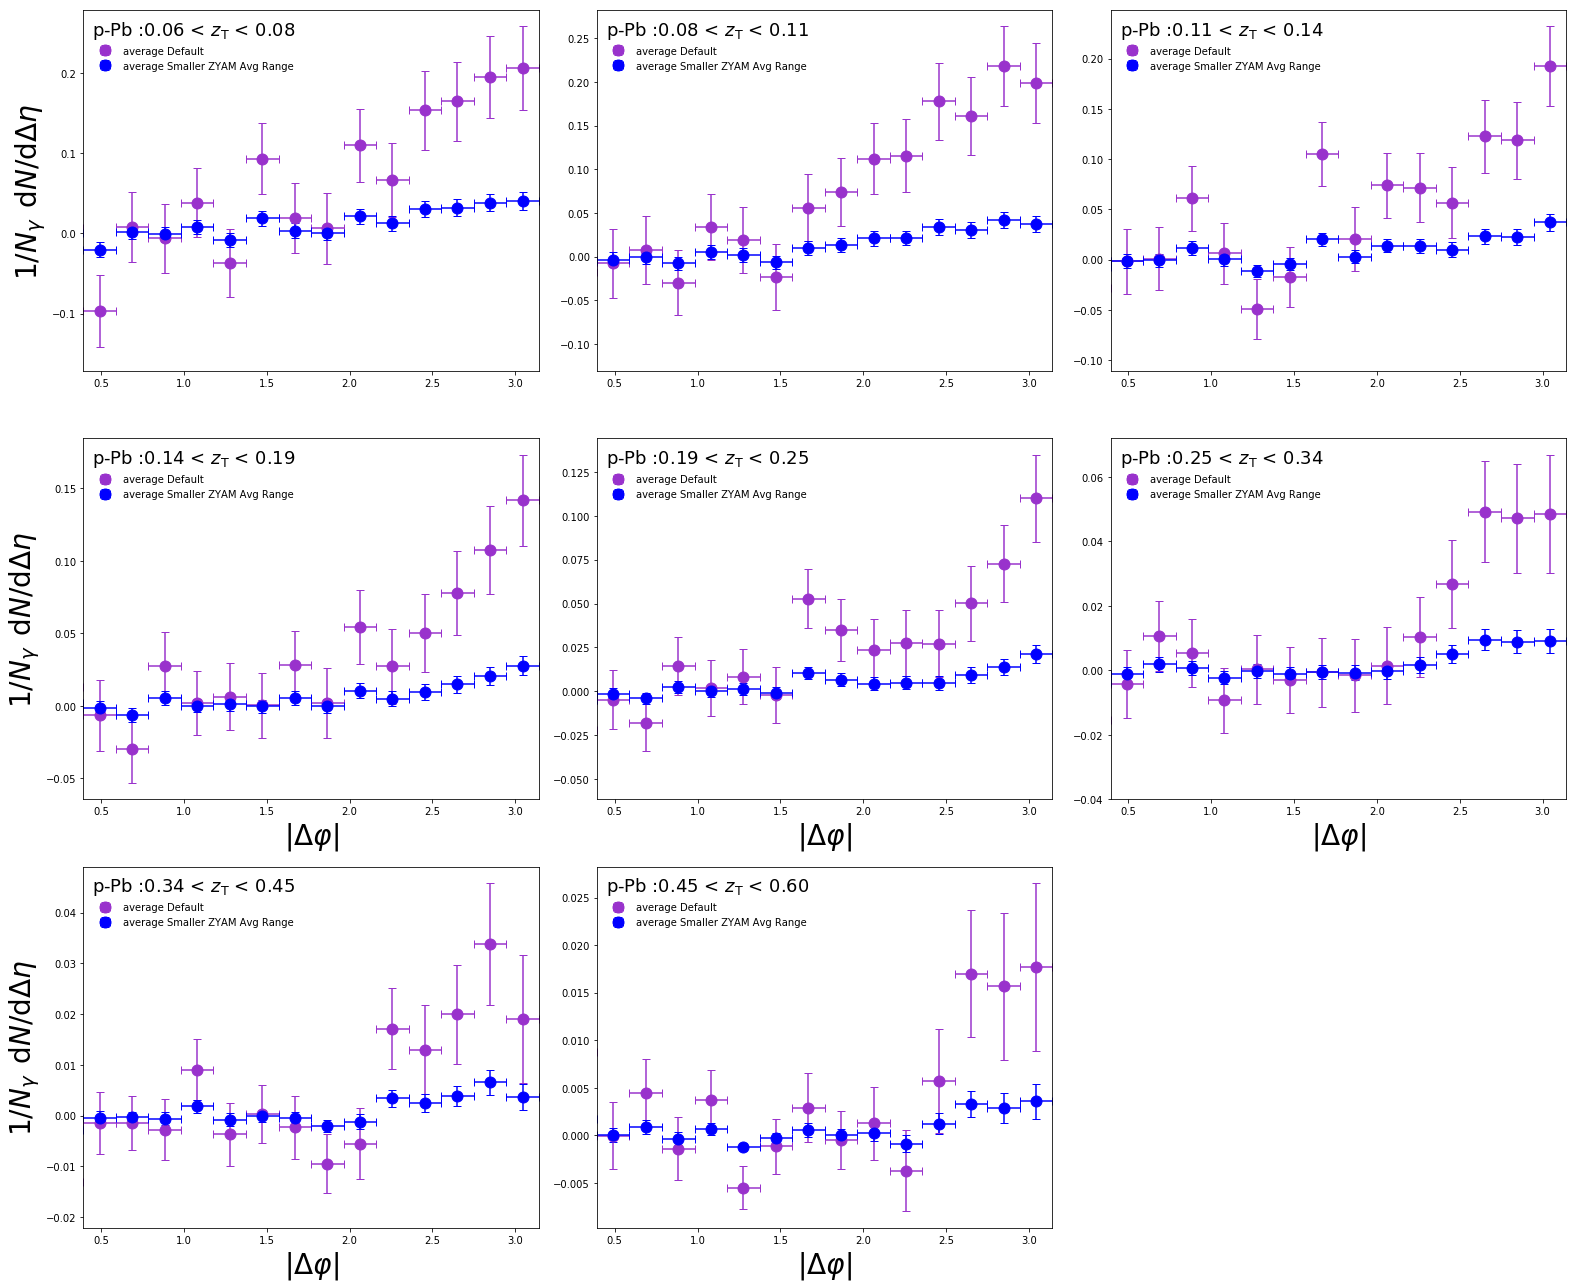

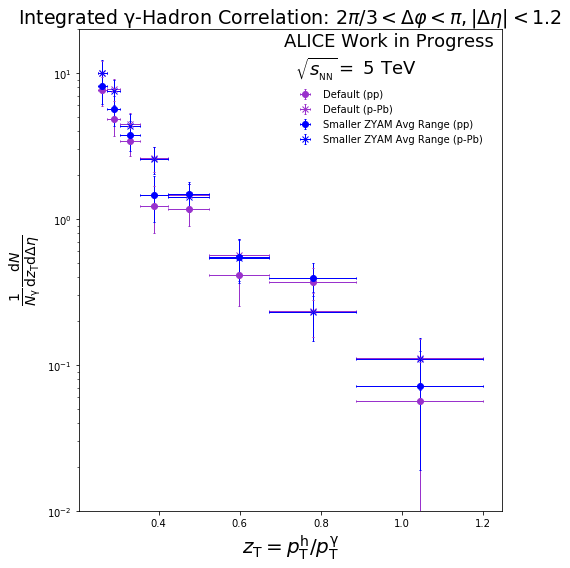

                Central Values:


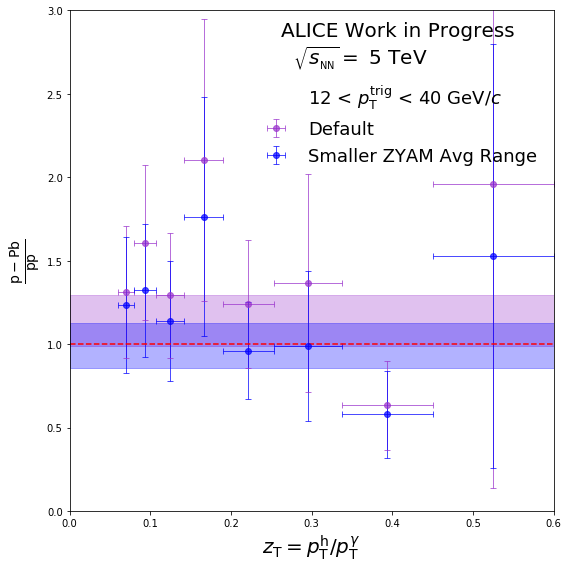

                Central Values:
[1.23224221 1.32240682 1.13881329 1.76339458 0.96182617 0.98979862
 0.58171242 1.52653497]

****************************************
Minimizer is Linear
Chi2                      =      6.66939
NDf                       =            7
p0                        =      1.14197   +/-   0.152282    

****************************************
Minimizer is Linear
Chi2                      =      5.02667
NDf                       =            7
p0                        =     0.993692   +/-   0.136227    


In [27]:
save_name = "ZYAM_Variation"
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTOldBinNewNewPurity_Small_Zyam"]
string_descriptions = ["Default","Smaller ZYAM Avg Range"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

In [28]:
strings = ["zT_Rebin_7_006zT06zT","zT_Rebin_8_006zT06zT","zT_Rebin_9_006zT06zT"]
string_descriptions = ["7 zT Bins","8 zT Bins","9 zT Bins","4 pT Bins"]

strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTOldBinNewNewPurity"]
string_descriptions = ["Old","New"]

colors = ["red","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

TypeError: Compare_pp_pPB_Avg_lists() takes exactly 4 arguments (3 given)

## Compare Different pT Binning

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE"]
string_descriptions = ["1 pT Bins","2 pT Bins","3 pT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
#Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,True)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [ ]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

In [ ]:
reload(functions_fragmentation)
from functions_fragmentation import *
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTpT2"]
string_descriptions = ["1 pT Bin","2 pT Bins"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_1_pDevPlus","pT_Rebin_1_pDevMinus","pT_Rebin_1_90p"]
string_descriptions = ["Cetral Purity","Purity Plus STDV","Purity Minus STDV","purity = 90%"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,False)